# Exercise 1

Work on this before the next lecture on 22 March. We will talk about questions, comments, and solutions during the exercise after the second lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/2). If you worked on things together with others please add their names to the notebook so we can see who formed groups.


## Objective

There are two objectives for this set of exercises:

* get you started using python, scikit-learn, matplotlib, and GitHub. You will be using them a lot during the course, so make sure you get a good foundation to build on.

* working through the steps of opening a new dataset, plotting the data, fitting a model to it, evaluating your model, and deciding on model complexity.

## Question 0

Install python, scikit-learn (v0.19), matplotlib, jupyter and git.

Instructions for doing so: https://github.com/wildtreetech/advanced-comp-2018/blob/master/install.md

Documentation and guides for the various tools:

* [jupyter quickstart](http://jupyter.readthedocs.io/en/latest/content-quickstart.html)
* [try jupyter without installing anything](https://try.jupyter.org/)
* [matplotlib homepage](http://matplotlib.org/)
* [matplotlib gallery](http://matplotlib.org/gallery.html)
* [scikit-learn homepage](http://scikit-learn.org/stable/)
* [scikit-learn examples](http://scikit-learn.org/stable/auto_examples/index.html)
* [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
* [try git online without installing anything](https://try.github.io/levels/1/challenges/1)


### GitHub and git

* [Create a GitHub account]() for yourself or use one you already have.
* Follow the guide on [creating a new repository](https://help.github.com/articles/create-a-repo/). Name the repository "advanced-comp-2018".

Read up on `git clone`, `git pull`, `git push`, `git add` and `git commit`. Once you master these five commands you should be good for this course. There is a whole universe of complex things that `git` can do for you, don't worry about them for now. Once you feel comfortable with the basics you can always step it up later.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [5]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

In the lecture we used the nearest neighbour classifier to classify points from a toy dataset into either "red" or "blue" classes. We investigated how the performance changes as a function of model complexity and what this means for the performance of our classifier on unseen data. 

* plot your dataset
* split your dataset into a training and testing set. Comment on how you decided to split your data.
* evaluate the performance of the classifier on your training dataset.
* evaluate the performance of the classifier on your testing dataset.
* repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment
  on what you see. Is there a "best" way to split your data?
* comment on why the two performance estimates agree or disagree.
* plot the accuracy of the classifier as a function of `n_neighbors`.
* comment on the similarities and differences between the performance on the testing and training dataset.
* is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?

Use `make_blobs(n_samples=400, centers=23, random_state=42)` to create a simple dataset and use the `KNeighborsClassifier` classifier to answer the above questions.

In [20]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

/Users/anthony/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


Performance of the classifier on the training dataset: Accuracy= 1.0
Performance of the classifier on the test dataset: Accuracy= 0.845


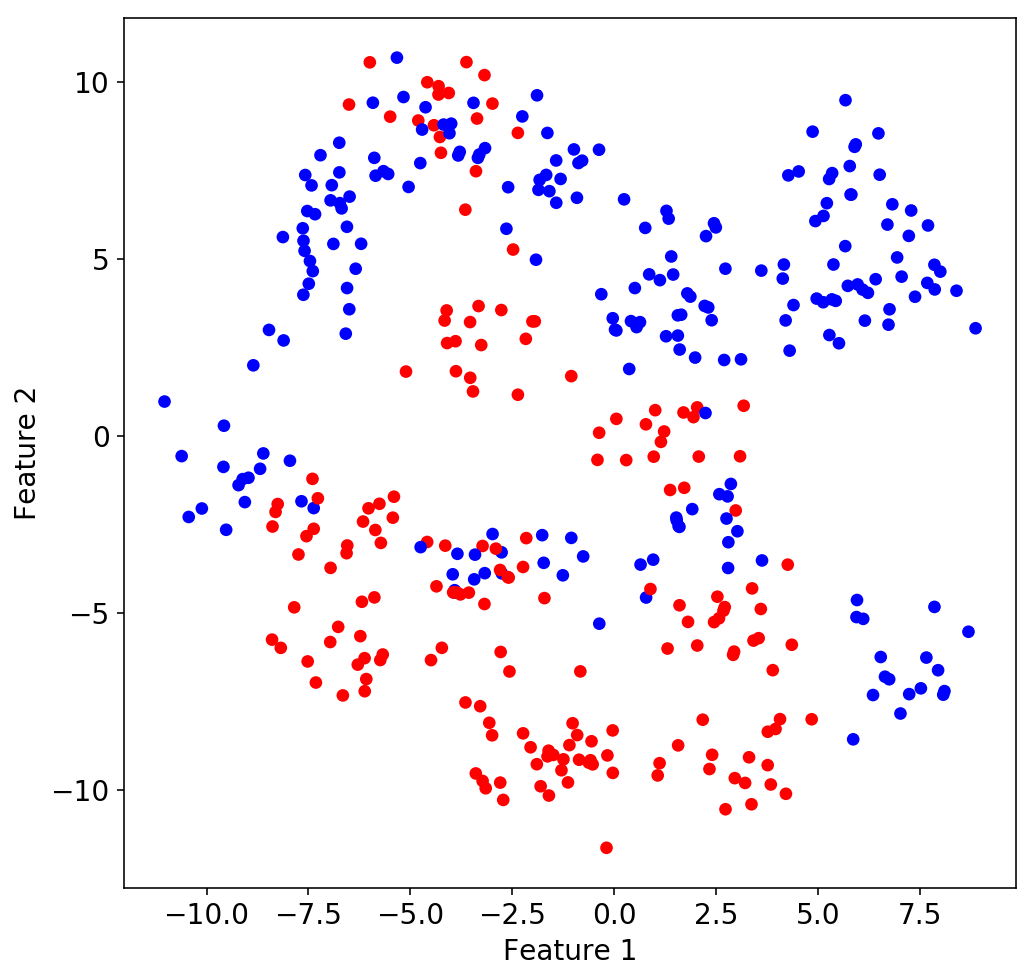

In [42]:
# Plot dataset
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Splitting of the dataset in half: half of the data is used for training and half for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

# Training the classifier with k=1
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train, y_train)

# Scores of the classifier
print("Performance of the classifier on the training dataset: Accuracy=", clf.score(X_train, y_train))
print("Performance of the classifier on the test dataset: Accuracy=", clf.score(X_test, y_test))

/Users/anthony/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


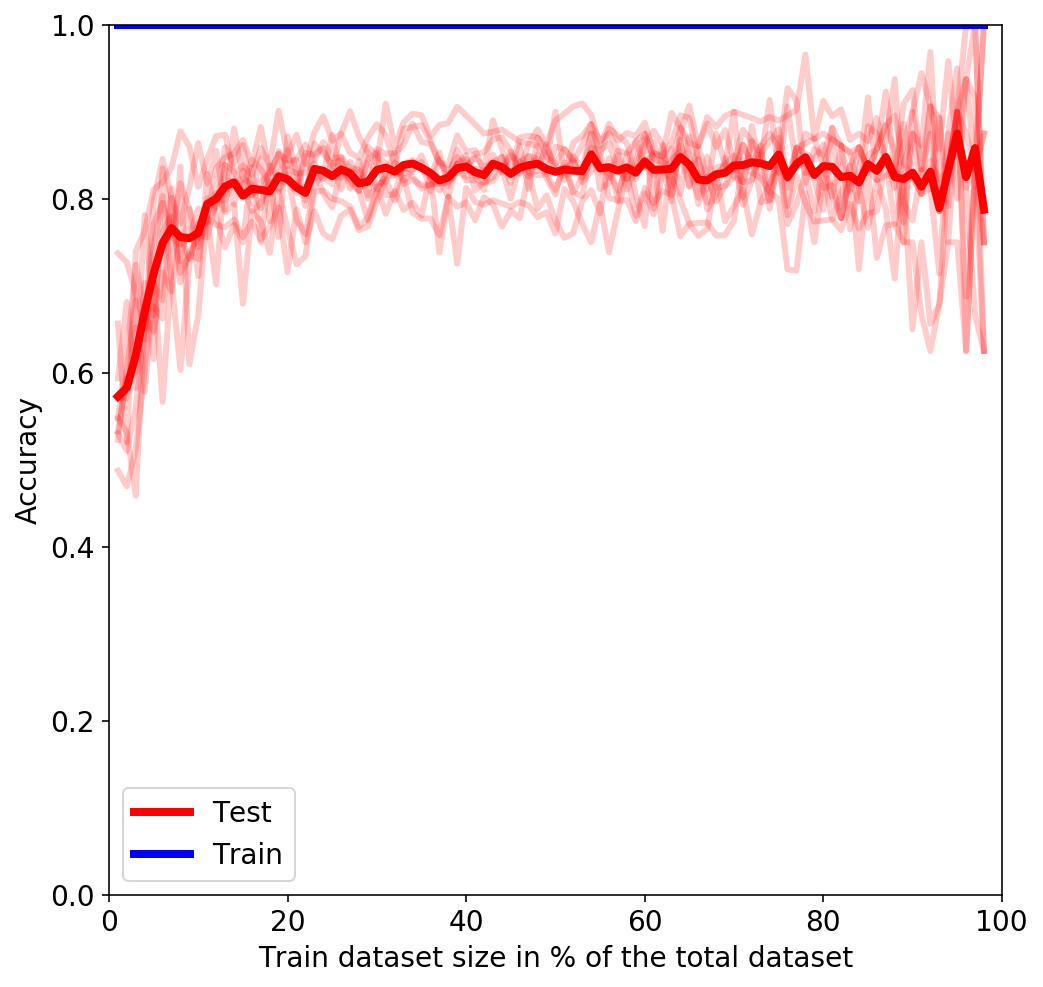

In [43]:
# Variating splitting ratio
accuracies_test = []
accuracies_train = []
rs = np.arange(1, 99, 1)

for n in range(10):
    # Create a new dataset each iteration
    X, y = make_blobs(n_samples=400, centers=23, random_state=42+n)
    y = np.take(labels, (y < 10))
    train_scores = []
    test_scores = []
    for r in rs:
        X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=r/100)
        clf = KNeighborsClassifier(n_neighbors=1)
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
        
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)
    
    plt.plot(rs, train_scores, c='b', alpha=0.2, lw=3)
    plt.plot(rs, test_scores, c='r', alpha=0.2, lw=3)
    #break
    
plt.plot(rs, np.array(accuracies_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(rs, np.array(accuracies_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('Train dataset size in % of the total dataset')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.xlim((0, 100))
plt.ylim((0., 1.));

The accuracy of the classifier on the train dataset is always 100%. That is expected as we set k=1 and thus the distance to the nearest neighbor is always 0 for the train dataset and there is no ambiguity on the classification.

There is no obvious best way to split the data as the accuracy of the classifier on the test dataset seems to reach a plateau, however if the train dataset is too small, then the behavior of the classifier is very poor. We have to use at least 20% of the dataset for training.

/Users/anthony/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


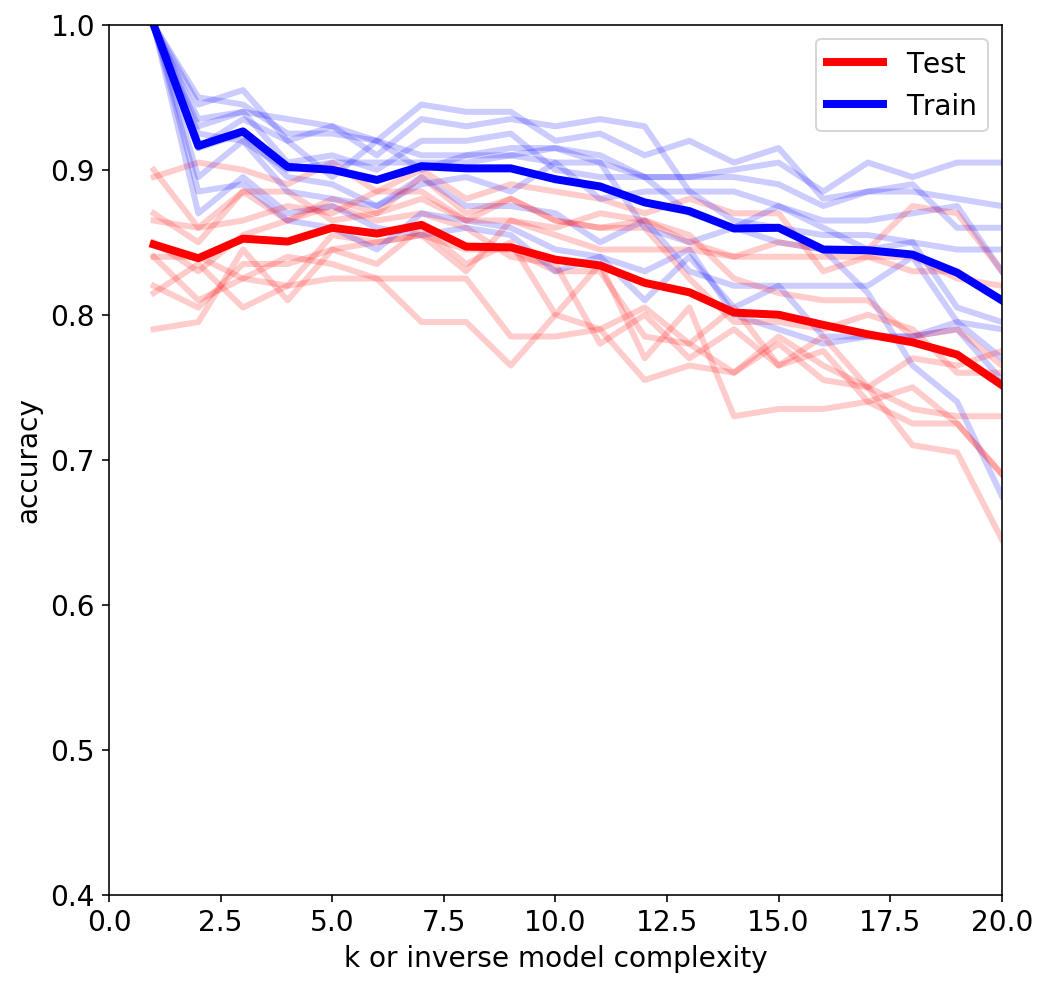

In [45]:
accuracies_test = []
accuracies_train = []
ks = np.arange(1, 21, 1)

for n in range(10):
    # Create a new dataset each iteration
    X, y = make_blobs(n_samples=400, centers=23, random_state=42+n)
    y = np.take(labels, (y < 10))
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    train_scores = []
    test_scores = []
    for k in ks:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
        
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)
    
    plt.plot(ks, train_scores, c='b', alpha=0.2, lw=3)
    plt.plot(ks, test_scores, c='r', alpha=0.2, lw=3)
    #break
    
plt.plot(ks, np.array(accuracies_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(ks, np.array(accuracies_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('k or inverse model complexity')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.xlim((0, max(ks)))
plt.ylim((0.4, 1.));

As the complexity of the model goes down, the accuracy of the classifier on the train dataset goes down.
The accuracy on the test dataset reach and maximum and then goes down too. We can select the optimal k by choosing the k for which the accuracy on the test dataset is maximal.

is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
The higher the number of neighbors, the lower the model complexity.

/Users/anthony/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


The best k for this dataset is k= 7


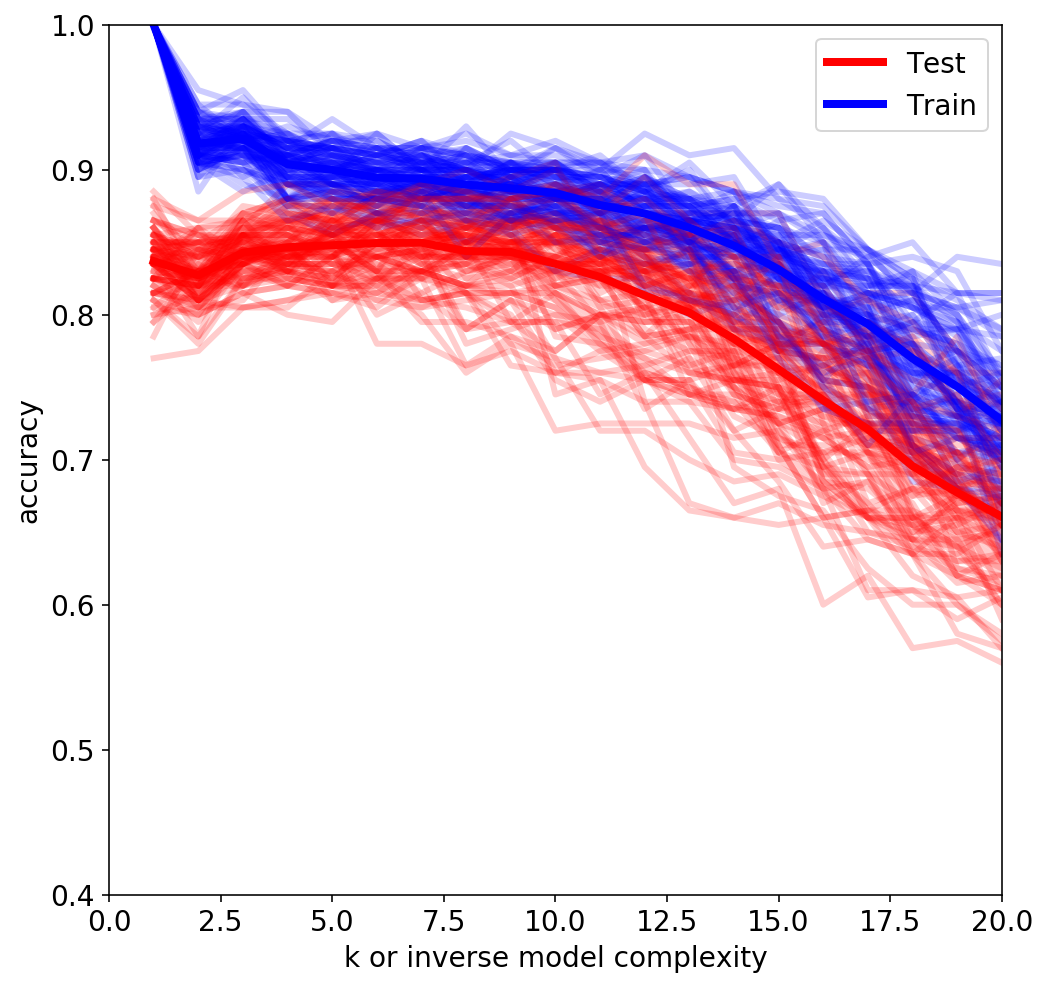

In [69]:
ks = np.arange(1, 21, 1)
accuracies_test = []
accuracies_train = []

X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))
for n in range(100):
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    train_scores = []
    test_scores = []
    for k in ks:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
        
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)
    
    plt.plot(ks, train_scores, c='b', alpha=0.2, lw=3)
    plt.plot(ks, test_scores, c='r', alpha=0.2, lw=3)
plt.plot(ks, np.array(accuracies_test).mean(axis=0), label='Test', c='r', lw=4)    
plt.plot(ks, np.array(accuracies_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('k or inverse model complexity')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.xlim((0, max(ks)))
plt.ylim((0.4, 1.));

meanTest=np.array(accuracies_test).mean(axis=0).tolist()
kmax=meanTest.index(max(meanTest))+1

print("The best k for this dataset is k=",kmax)

The best number of neighbours to use is k=7. For this value, on average over different splitting of the dataset at 50%, the accuracy on the test dataset is maximal.

---

## Question 2

This is a regression problem. It mostly follows the setup of the classification problem so you should be able to reuse some of your work.

* plot your dataset
* fit a kNN regressor with varying number of `n_neighbors` and compare each regressors predictions to the location of the training and testing points. 
* plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.
* comment on the similarities and differences between the performance on the testing and training dataset.
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?
* can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?

Use `make_regression()` to create the dataset and use `KNeighborsRegressor` to answer the above questions. Take a look at scikit-learn's [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the mean squared error.

In [74]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

Text(0,0.5,'f(x)')

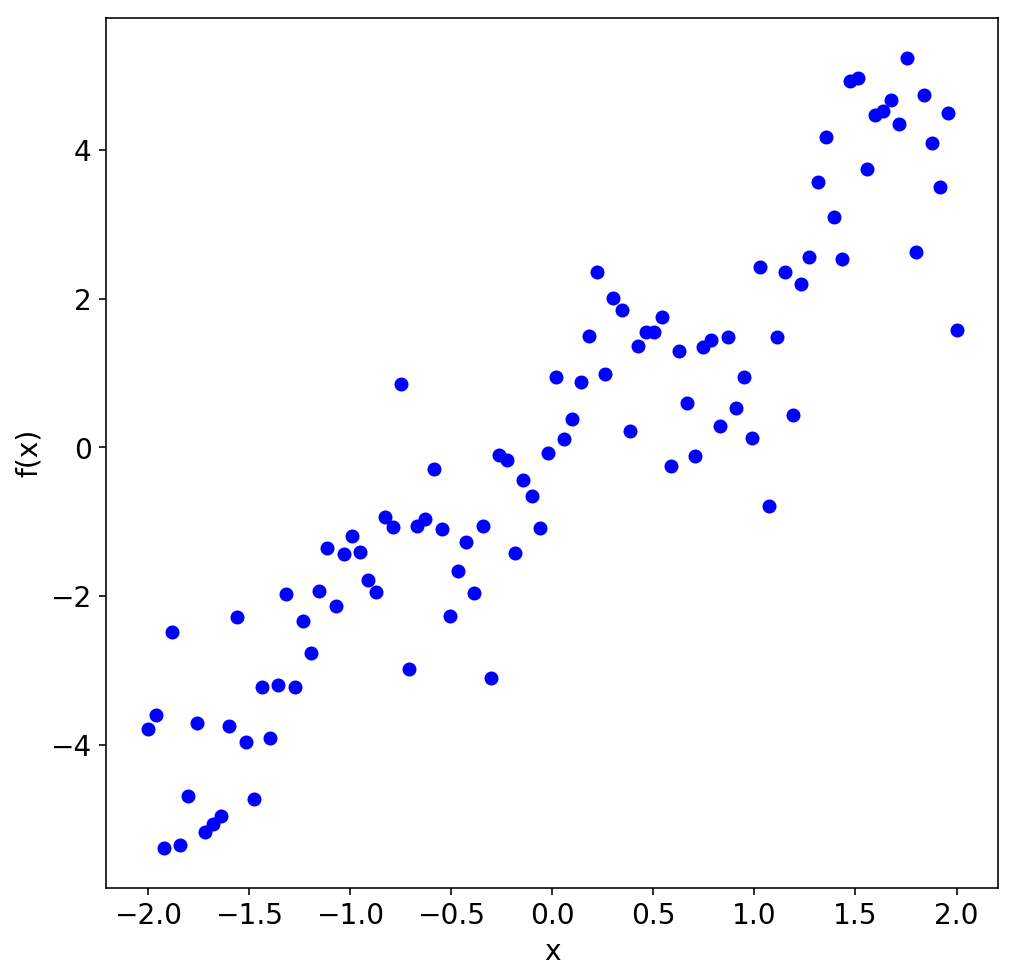

In [84]:
# Generating and plotting the regression as a scatter plot
X, y = make_regression()
plt.scatter(X, y, c='b')
plt.xlabel("x")
plt.ylabel("f(x)")

---

## Question 3

Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem. Think about what method you could use to increase the complexity of a logistic regression model. Visualise the classification accuracy as a function of the model complexity.

Use `make_circles(n_samples=400, factor=.3, noise=.1)` to create a simple dataset and use the `LogisticRegression` classifier to answer the above question.

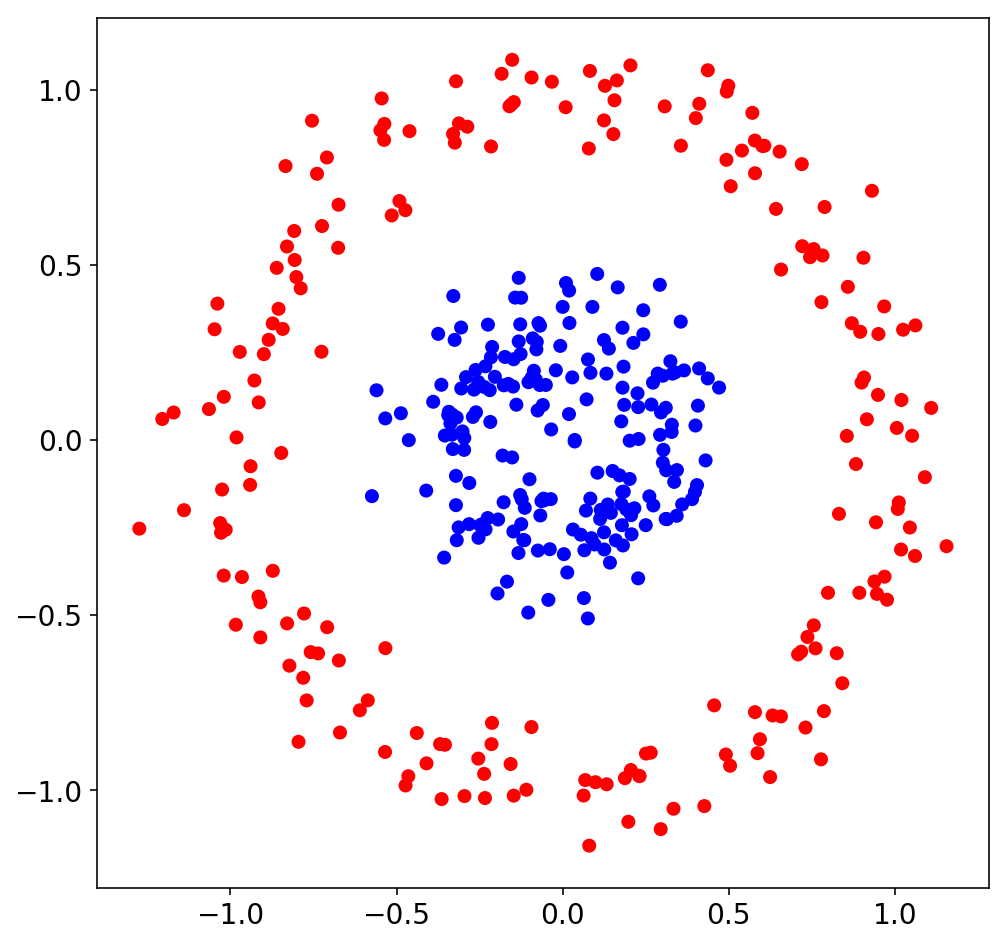

In [8]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

In [9]:
# Your answer
